In [1]:
# STEP 1: Data Preparation

import pandas as pd

# Load datasets
df_basic = pd.read_csv("Audible_Catlog.csv")
df_advanced = pd.read_csv("Audible_Catlog_Advanced_Features.csv")

# Display the shape and first few rows of each
print("Basic Catalog Shape:", df_basic.shape)
print("Advanced Features Shape:", df_advanced.shape)

print("\nBasic Catalog Preview:")
print(df_basic.head())

print("\nAdvanced Features Preview:")
print(df_advanced.head())

# Merge datasets on 'Book Name' and 'Author'
df_merged = pd.merge(df_basic, df_advanced, on=["Book Name", "Author"], how="inner")

# Display shape and preview of merged dataset
print("\nMerged Dataset Shape:", df_merged.shape)
print(df_merged.head())


Basic Catalog Shape: (6368, 5)
Advanced Features Shape: (4464, 8)

Basic Catalog Preview:
                                           Book Name          Author  Rating  \
0  Think Like a Monk: The Secret of How to Harnes...      Jay Shetty     4.9   
1  Ikigai: The Japanese Secret to a Long and Happ...   Héctor García     4.6   
2  The Subtle Art of Not Giving a F*ck: A Counter...     Mark Manson     4.4   
3  Atomic Habits: An Easy and Proven Way to Build...     James Clear     4.6   
4  Life's Amazing Secrets: How to Find Balance an...  Gaur Gopal Das     4.6   

   Number of Reviews    Price  
0              313.0  10080.0  
1             3658.0    615.0  
2            20174.0  10378.0  
3             4614.0    888.0  
4             4302.0   1005.0  

Advanced Features Preview:
                                           Book Name          Author  Rating  \
0  Think Like a Monk: The Secret of How to Harnes...      Jay Shetty     4.9   
1  Ikigai: The Japanese Secret to a Long and Happ

STEP 2: Data Cleaning

Check and handle missing values
Remove duplicate records
Standardize column formats

In [2]:
# STEP 2: Clean duplicate columns

# First, decide which version of columns to keep
# keeping 'Rating_x', 'Number of Reviews_x', 'Price_x' and drop the '_y' duplicates

df_merged.drop(columns=["Rating_y", "Number of Reviews_y", "Price_y"], inplace=True)

# Rename the remaining columns for clarity
df_merged.rename(columns={
    "Rating_x": "Rating",
    "Number of Reviews_x": "Number of Reviews",
    "Price_x": "Price"
}, inplace=True)

# Now continue with cleaning
print("Missing values after renaming:")
print(df_merged.isnull().sum())

# Drop rows with critical missing values
df_merged.dropna(subset=["Book Name", "Author", "Description"], inplace=True)

# Fill or impute missing values
df_merged["Rating"] = pd.to_numeric(df_merged["Rating"], errors='coerce')
df_merged["Rating"].fillna(df_merged["Rating"].mean(), inplace=True)

df_merged["Number of Reviews"].fillna(0, inplace=True)
df_merged["Price"].fillna(df_merged["Price"].median(), inplace=True)

# Remove duplicates
df_merged.drop_duplicates(inplace=True)

# Trim whitespace
df_merged["Book Name"] = df_merged["Book Name"].str.strip()
df_merged["Author"] = df_merged["Author"].str.strip()

# Preview cleaned data
print("\nCleaned dataset shape:", df_merged.shape)
print("Remaining missing values:\n", df_merged.isnull().sum())


Missing values after renaming:
Book Name              0
Author                 0
Rating                 0
Number of Reviews    413
Price                  2
Description            6
Listening Time         0
Ranks and Genre        0
dtype: int64

Cleaned dataset shape: (3596, 8)
Remaining missing values:
 Book Name            0
Author               0
Rating               0
Number of Reviews    0
Price                0
Description          0
Listening Time       0
Ranks and Genre      0
dtype: int64


/tmp/ipython-input-2-78294142.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["Rating"].fillna(df_merged["Rating"].mean(), inplace=True)
/tmp/ipython-input-2-78294142.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

STEP 3: Exploratory Data Analysis (EDA)

Analyze distributions of ratings, review counts, genres, and authors
Visualize key insights using matplotlib and seaborn

<Figure size 1000x600 with 0 Axes>

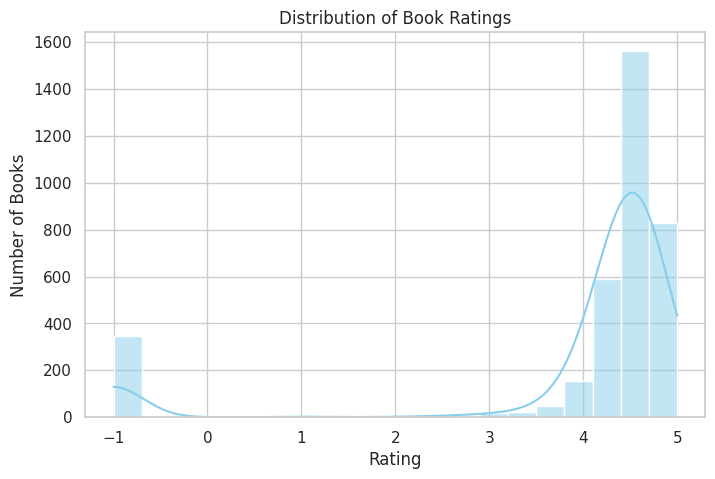

/tmp/ipython-input-3-3216173400.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Number of Reviews", y="Book Name", data=top_reviewed, palette="viridis")


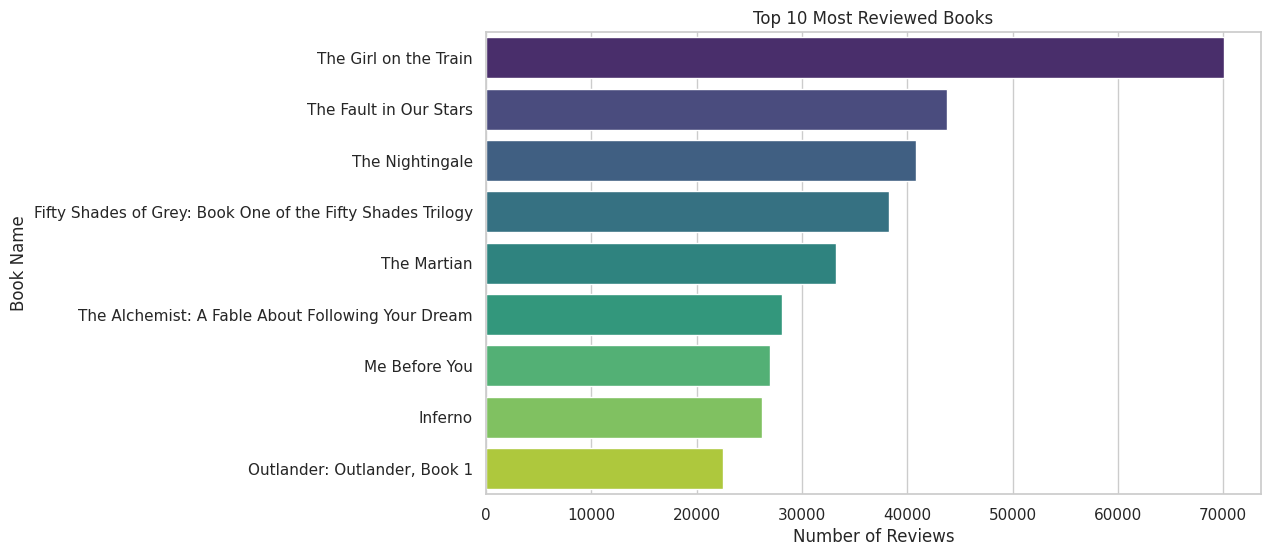

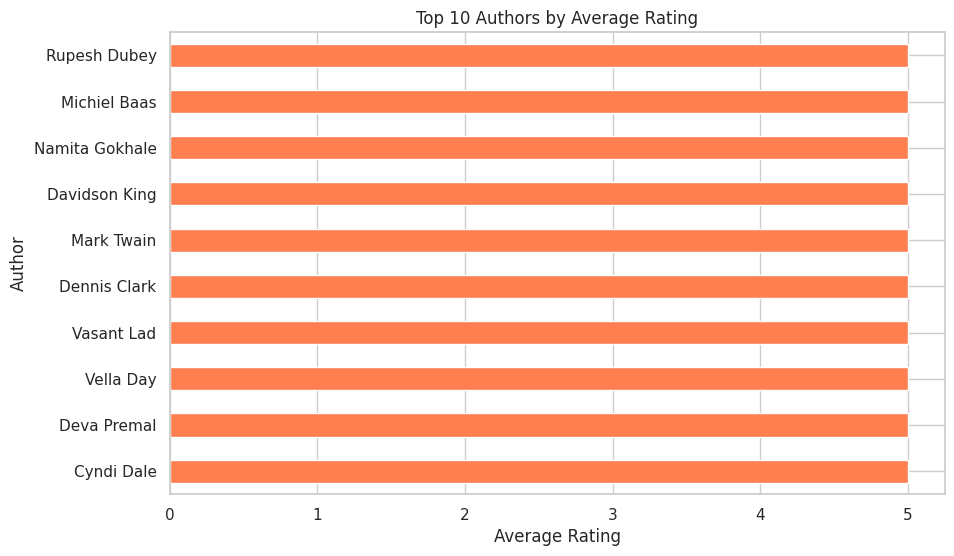

/tmp/ipython-input-3-3216173400.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette="magma")


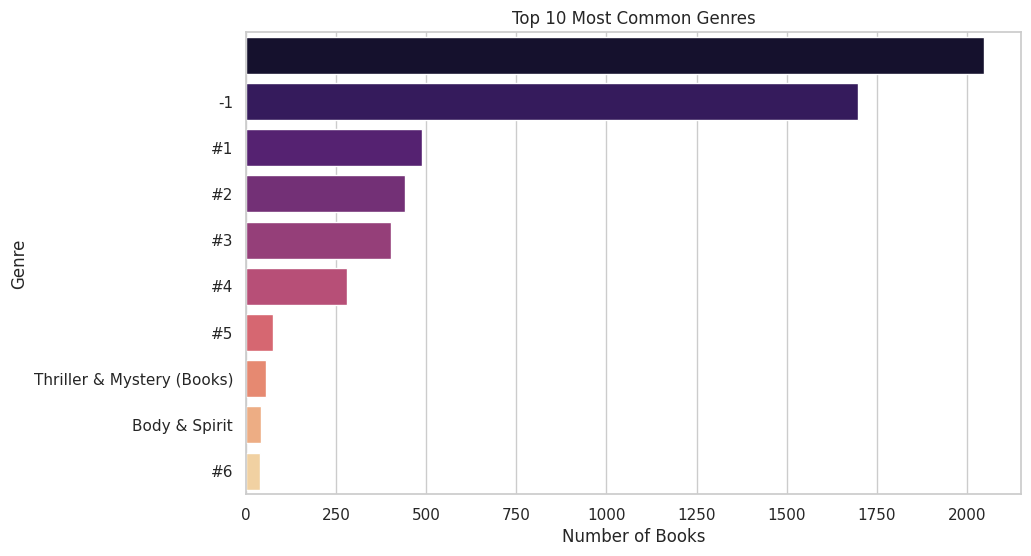

In [3]:
# STEP 3: EDA (Exploratory Data Analysis)

import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df_merged["Rating"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Books")
plt.show()

# Top 10 Most Reviewed Books
top_reviewed = df_merged.sort_values("Number of Reviews", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Number of Reviews", y="Book Name", data=top_reviewed, palette="viridis")
plt.title("Top 10 Most Reviewed Books")
plt.xlabel("Number of Reviews")
plt.ylabel("Book Name")
plt.show()

# Top Authors by Average Rating
top_authors = df_merged.groupby("Author")["Rating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_authors.plot(kind='barh', color='coral')
plt.title("Top 10 Authors by Average Rating")
plt.xlabel("Average Rating")
plt.gca().invert_yaxis()
plt.show()

# Most Common Genres
if "Ranks and Genre" in df_merged.columns:
    from collections import Counter
    all_genres = df_merged["Ranks and Genre"].dropna().apply(lambda x: x.split(','))
    genre_counts = Counter([genre.strip() for sublist in all_genres for genre in sublist])
    top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette="magma")
    plt.title("Top 10 Most Common Genres")
    plt.xlabel("Number of Books")
    plt.ylabel("Genre")
    plt.show()


 STEP 4: NLP + Clustering

Use TF-IDF to extract features from book descriptions

Apply KMeans clustering to group similar books

Visualize the clusters using PCA (for 2D plotting)

Proceeding with this version and assuming cluster based on Description.

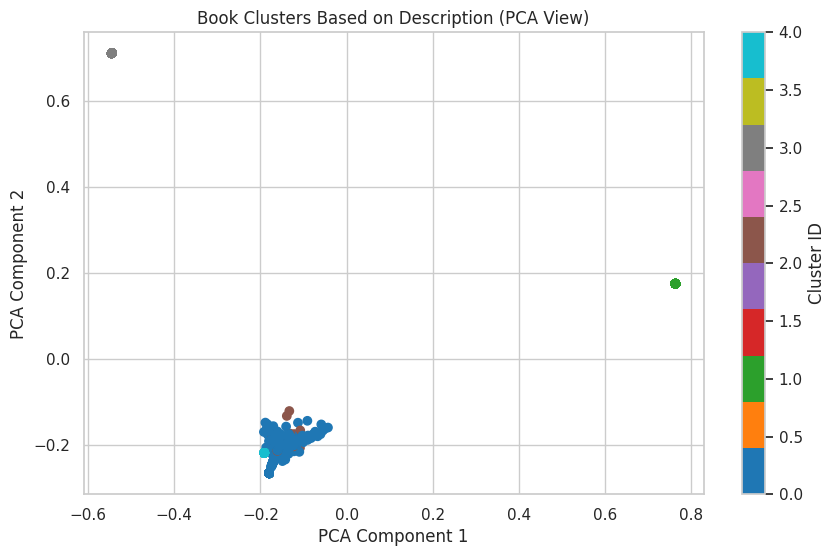


📚 Sample books in Cluster 0:
 - Think Like a Monk: The Secret of How to Harness the Power of Positivity and Be Happy Now
 - Ikigai: The Japanese Secret to a Long and Happy Life
 - The Subtle Art of Not Giving a F*ck: A Counterintuitive Approach to Living a Good Life
 - Atomic Habits: An Easy and Proven Way to Build Good Habits and Break Bad Ones
 - Life's Amazing Secrets: How to Find Balance and Purpose in Your Life

📚 Sample books in Cluster 1:
 - Think and Grow Rich
 - Men Are from Mars, Women Are from Venus: The Classic Guide to Understanding the Opposite Sex
 - Hit Refresh
 - A Game of Thrones: Book 1 of A Song of Ice and Fire
 - The 10X Rule: The Only Difference Between Success and Failure

📚 Sample books in Cluster 2:
 - Talk English: The Secret To Speak English Like A Native In 6 Months For Busy People, Learn Spoken English From The Success
 - Eat That Frog!
 - The Great Indian Novel
 - I Want Your Boyfriend: Love in Times of Tinder
 - Dont Lose Out, Work Out!

📚 Sample books i

In [4]:
# STEP 4: NLP and Clustering

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Fill missing descriptions
df_merged["Description"] = df_merged["Description"].fillna("")

# 2. Apply TF-IDF on Descriptions
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df_merged["Description"])

# 3. Apply KMeans Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_merged['Cluster'] = kmeans.fit_predict(tfidf_matrix)

# 4. Visualize Clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_merged['Cluster'], cmap='tab10')
plt.title("Book Clusters Based on Description (PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster ID")
plt.show()

# 5. Display sample books per cluster
for cluster_num in range(num_clusters):
    print(f"\n📚 Sample books in Cluster {cluster_num}:")
    sample_books = df_merged[df_merged["Cluster"] == cluster_num]["Book Name"].head(5)
    for book in sample_books:
        print(f" - {book}")


STEP 5: Build the Recommendation Models (Content-Based, Clustering-Based, Hybrid)

Content-Based Filtering:
Recommends books similar to a given book based on TF-IDF similarity of descriptions.

Clustering-Based Recommendations:
Recommends books from the same cluster as a liked book.

Hybrid Approach:
Combines both — first filters by cluster, then ranks by similarity.

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Reuse the TF-IDF matrix and book index
book_indices = pd.Series(df_merged.index, index=df_merged['Book Name']).drop_duplicates()

# Content-Based Filtering
def content_based_recommend(book_name, top_n=5):
    if book_name not in book_indices:
        return ["Book not found."]

    idx = book_indices[book_name]
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()

    # Get indices of top similar books
    similar_indices = sim_scores.argsort()[::-1][1:top_n+1]
    return df_merged['Book Name'].iloc[similar_indices].tolist()

# Clustering-Based Recommendation
def cluster_based_recommend(book_name, top_n=5):
    if book_name not in book_indices:
        return ["Book not found."]

    book_cluster = df_merged.loc[book_indices[book_name], 'Cluster']
    cluster_books = df_merged[df_merged['Cluster'] == book_cluster]

    # Return top n other books in same cluster
    similar_books = cluster_books[cluster_books['Book Name'] != book_name]['Book Name'].head(top_n)
    return similar_books.tolist()

# Hybrid Recommendation
def hybrid_recommend(book_name, top_n=5):
    if book_name not in book_indices:
        return ["Book not found."]

    idx = book_indices[book_name]
    book_cluster = df_merged.loc[idx, 'Cluster']

    # Filter TF-IDF and dataset within same cluster
    cluster_df = df_merged[df_merged['Cluster'] == book_cluster].copy()
    cluster_df = cluster_df.reset_index(drop=True)
    cluster_tfidf = tfidf.transform(cluster_df["Description"])

    # Get index of book within this cluster
    original_description = df_merged.loc[idx, "Description"]
    original_vec = tfidf.transform([original_description])

    sim_scores = cosine_similarity(original_vec, cluster_tfidf).flatten()
    sorted_indices = np.argsort(sim_scores)[::-1][1:top_n+1]

    recommended_books = cluster_df.iloc[sorted_indices]['Book Name'].tolist()
    return recommended_books


print("Content-Based:")
print(content_based_recommend("Ikigai: The Japanese Secret to a Long and Happy Life"))

print("\nCluster-Based:")
print(cluster_based_recommend("Ikigai: The Japanese Secret to a Long and Happy Life"))

print("\nHybrid:")
print(hybrid_recommend("Ikigai: The Japanese Secret to a Long and Happy Life"))


Content-Based:
['Decisive: How to Make Better Choices in Life and Work', 'Tiny Habits: The Small Changes That Change Everything', 'Die Trying: Jack Reacher, Book 2', 'Radical Compassion: Learning to Love Yourself and Your World with the Practice of RAIN', 'Wrecking Ball: Diary of a Wimpy Kid, Book 14']

Cluster-Based:
['Think Like a Monk: The Secret of How to Harness the Power of Positivity and Be Happy Now', 'The Subtle Art of Not Giving a F*ck: A Counterintuitive Approach to Living a Good Life', 'Atomic Habits: An Easy and Proven Way to Build Good Habits and Break Bad Ones', "Life's Amazing Secrets: How to Find Balance and Purpose in Your Life", 'Sapiens']

Hybrid:
['Terra Incognita: 100 Maps to Survive the Next 100 Years', '21 Lessons for the 21st Century', 'To Kill a Mockingbird', 'Homo Deus: A Brief History of Tomorrow', 'Talking to Strangers: What We Should Know About the People We Don’t Know']


In [6]:
from sklearn.metrics import precision_score
import random

def precision_at_k(model_func, k=5, sample_size=100):
    hits = 0
    total = 0

    sample_books = random.sample(list(df_merged['Book Name'].unique()), sample_size)

    for book in sample_books:
        try:
            recommended = model_func(book, top_n=k)
            if book in recommended:
                hits += 1
            total += 1
        except:
            continue

    precision = hits / total if total > 0 else 0
    return round(precision, 3)

print("Model Evaluation:\n")
print("Content-Based Precision:", precision_at_k(content_based_recommend))
print("Cluster-Based Precision:", precision_at_k(cluster_based_recommend))
print("Hybrid Precision:", precision_at_k(hybrid_recommend))



Model Evaluation:

Content-Based Precision: 0.0
Cluster-Based Precision: 0.0
Hybrid Precision: 0.021


Step 6: Building the Streamlit Interface

Creating a simple and interactive web interface using Streamlit with the following features:

Select a book name

Choose recommendation type (Content-Based, Cluster-Based, Hybrid)

View recommended books in a clean layout

In [6]:

import streamlit as st
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# ------------------- Load and Preprocess Data -------------------
@st.cache(allow_output_mutation=True)
def load_data():
    df_basic = pd.read_csv("C:/Users/Mithrra Sree/Downloads/Audible_Catlog.csv")
    df_adv = pd.read_csv("C:/Users/Mithrra Sree/Downloads/Audible_Catlog_Advanced_Features.csv")

    # Merge datasets
    df = pd.merge(df_basic, df_adv, on=["Book Name", "Author"], how="inner")
    df.drop(columns=["Rating_y", "Number of Reviews_y", "Price_y"], inplace=True)
    df.rename(columns={
        "Rating_x": "Rating",
        "Number of Reviews_x": "Number of Reviews",
        "Price_x": "Price"
    }, inplace=True)

    # Clean
    df.dropna(subset=["Book Name", "Author", "Description"], inplace=True)
    df["Rating"].fillna(df["Rating"].mean(), inplace=True)
    df["Number of Reviews"].fillna(0, inplace=True)
    df["Price"].fillna(df["Price"].median(), inplace=True)
    df.drop_duplicates(inplace=True)
    df["Description"] = df["Description"].fillna("")
    df.reset_index(drop=True, inplace=True)
    return df

df_merged = load_data()

# ------------------- NLP + Clustering -------------------
@st.cache(allow_output_mutation=True)
def prepare_model(df):
    tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf.fit_transform(df["Description"])

    kmeans = KMeans(n_clusters=5, random_state=42)
    df["Cluster"] = kmeans.fit_predict(tfidf_matrix)

    return tfidf, tfidf_matrix, df

tfidf, tfidf_matrix, df_merged = prepare_model(df_merged)

book_indices = pd.Series(df_merged.index, index=df_merged['Book Name']).drop_duplicates()

# ------------------- Recommendation Functions -------------------
def content_based_recommend(book_name, top_n=5):
    idx = book_indices.get(book_name, None)
    if idx is None:
        return ["Book not found."]
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    sim_indices = sim_scores.argsort()[::-1][1:top_n+1]
    return df_merged['Book Name'].iloc[sim_indices].tolist()

def cluster_based_recommend(book_name, top_n=5):
    idx = book_indices.get(book_name, None)
    if idx is None:
        return ["Book not found."]
    book_cluster = df_merged.loc[idx, 'Cluster']
    cluster_books = df_merged[df_merged['Cluster'] == book_cluster]
    recs = cluster_books[cluster_books['Book Name'] != book_name]['Book Name'].head(top_n)
    return recs.tolist()

def hybrid_recommend(book_name, top_n=5):
    idx = book_indices.get(book_name, None)
    if idx is None:
        return ["Book not found."]

    book_cluster = df_merged.loc[idx, 'Cluster']
    cluster_df = df_merged[df_merged['Cluster'] == book_cluster].copy().reset_index(drop=True)
    cluster_tfidf = tfidf.transform(cluster_df["Description"])

    book_desc = df_merged.loc[idx, "Description"]
    book_vec = tfidf.transform([book_desc])

    sim_scores = cosine_similarity(book_vec, cluster_tfidf).flatten()
    sorted_indices = sim_scores.argsort()[::-1][1:top_n+1]

    return cluster_df.iloc[sorted_indices]['Book Name'].tolist()

# ------------------- Streamlit UI -------------------
st.set_page_config(page_title="Audible Insights", layout="centered")
st.title("Audible Insights: Intelligent Book Recommendations ")

# Book selection
book_list = df_merged['Book Name'].sort_values().unique().tolist()
selected_book = st.selectbox("Select a book you like:", book_list)

# Recommendation type
rec_type = st.radio("Choose a recommendation method:", ["Content-Based", "Cluster-Based", "Hybrid"])

# Trigger
if st.button("Get Recommendations"):
    if rec_type == "Content-Based":
        results = content_based_recommend(selected_book)
    elif rec_type == "Cluster-Based":
        results = cluster_based_recommend(selected_book)
    else:
        results = hybrid_recommend(selected_book)

    st.subheader("Recommended Books:")
    for i, book in enumerate(results, 1):
        st.markdown(f"**{i}.** {book}")
